## Treppenauswertung

Dieses Notebook ist eine Sammelstelle für alle Auswertungen.

Zunächst nur ein paar Übersichtsstatistiken: Wie viele Episoden, Spieler\*innen, Runden, Review-Seiten und Guesses gab es insgesamt?

In [1]:
# lade die Daten
import json
with open('data.json', encoding = 'utf-8') as f:
    data = json.load(f)

In [2]:
players = set()
sources = set()
rounds  = 0
reviews = 0
guesses = 0
guessed_films = set()
# Schleife über Episoden
print('%d Episoden' % len(data))
for episode in data:
    for player in episode['players']:
        players.add(player)
    rounds  += len(episode['rounds'])
    for round in episode['rounds']:
        reviews += len(round['reviews'])
        for review in round['reviews']:
            source = review['source']
            if '(' in source:
                source = source[:source.index('(')-1]
            sources.add(source)
            guesses += len(review['guesses'])
            for guess in review['guesses']:
                guessed_films.add(guess['url'])

print('%d Spieler*innen' % len(players))
print('%d Runden' % rounds)
print('%d Quellen' % len(sources))
print('%d reviews' % reviews)
print('%d guesses' % guesses)
print('%d verschiedene Filme' % len(guessed_films))

31 Episoden
26 Spieler*innen
152 Runden
198 Quellen
658 reviews
3093 guesses
1370 verschiedene Filme


## Der 1000. guess

Jan bat darum, den 1000. guess herauszufinden. Das mache ich natürlich gern:

In [3]:
import copy
guess_list = []
guess_list_unique = []
guessed_films = set()
for episode in data:
    r = 0
    for round in episode['rounds']:
        r += 1
        for review in round['reviews']:
            for guess in review['guesses']:
                guess_copy = copy.copy(guess)
                guess_copy['episode'] = episode['index']
                guess_copy['round'] = r
                guess_list.append(guess_copy)
                if guess['url'] not in guessed_films:
                    guess_list_unique.append(guess_copy)
                guessed_films.add(guess['url'])

important_points = [1, 10, 50, 100, 500, 1000]
for t in important_points:
    if t <= len(guess_list):
        guess = guess_list[t-1]
        print('Der %d. guess: %s (%s; von %s in Runde %d von Episode %d)' % (t, guess['movie'], guess['url'], guess['player'], guess['round'], guess['episode']))
for t in important_points:
    if t <= len(guess_list_unique):
        guess = guess_list_unique[t-1]
        print('Der %d. nicht-wiederholte guess: %s (%s; von %s in Runde %d von Episode %d)' % (t, guess['movie'], guess['url'], guess['player'], guess['round'], guess['episode']))

Der 1. guess: Star Wars (https://letterboxd.com/film/star-wars/; von Jan in Runde 1 von Episode 0)
Der 10. guess: Warcraft (https://letterboxd.com/film/warcraft/; von Jan in Runde 1 von Episode 0)
Der 50. guess: Enter the Void (https://letterboxd.com/film/enter-the-void/; von Jan in Runde 3 von Episode 2)
Der 100. guess: Booksmart (https://letterboxd.com/film/booksmart/; von Jan in Runde 5 von Episode 2)
Der 500. guess: Lady Bird (https://letterboxd.com/film/lady-bird/; von Christiane in Runde 3 von Episode 11)
Der 1000. guess: High School Musical (https://letterboxd.com/film/high-school-musical/; von Miriam in Runde 5 von Episode 18)
Der 1. nicht-wiederholte guess: Star Wars (https://letterboxd.com/film/star-wars/; von Jan in Runde 1 von Episode 0)
Der 10. nicht-wiederholte guess: Warcraft (https://letterboxd.com/film/warcraft/; von Jan in Runde 1 von Episode 0)
Der 50. nicht-wiederholte guess: Under the Silver Lake (https://letterboxd.com/film/under-the-silver-lake/; von Jan in Runde

## Die heißesten Treppen

In der folgenden Auswertung gehen wir auf die Suche nach der heißesten Treppe. Dabei benutzen wir folgende Kriterien:
1. Welche Treppe wurde am häufigsten geraten?
2. Welche Treppe wurde am schnellsten/langsamsten erraten? Sowohl in Zeit, als auch in der Anzahl der benötigten guesses.

In [4]:
# Analysiere die am meisten geratenen Treppen
from collections import Counter

movie_map = {}
movie_counter = Counter()
for episode in data:
    r = 0
    for round in episode['rounds']:
        r += 1
        for review in round['reviews']:
            for guess in review['guesses']:
                guess_copy = copy.copy(guess)
                guess_copy['episode'] = episode['index']
                guess_copy['round'] = r
                movie_map.setdefault(guess['url'], [])
                movie_map[guess['url']].append(guess_copy)
                movie_counter[guess['url']] += 1

for (movie_url, count) in movie_counter.most_common():
    # Zeige nur die Treppen an, die wenigstens 2 mal geraten wurden
    if count < 6:
        break
    guess_list = movie_map[movie_url]
    print('%s: %d mal, und zwar:' % (guess_list[0]['movie'], movie_counter[movie_url]))
    for guess in guess_list:
        print('\t%s in Runde %d von Episode %d' % (guess['player'], guess['round'], guess['episode']))

Fight Club: 23 mal, und zwar:
	Christiane in Runde 2 von Episode 3
	Christiane in Runde 1 von Episode 5
	Sumi in Runde 3 von Episode 5
	Jan in Runde 4 von Episode 6
	Christopher in Runde 1 von Episode 7
	Christopher in Runde 2 von Episode 7
	Sumi in Runde 3 von Episode 7
	Jan in Runde 1 von Episode 8
	Jan in Runde 4 von Episode 8
	Max in Runde 1 von Episode 11
	Max in Runde 5 von Episode 11
	Jan in Runde 3 von Episode 16
	Jan in Runde 5 von Episode 16
	Miriam in Runde 2 von Episode 18
	Miriam in Runde 3 von Episode 18
	Christiane in Runde 1 von Episode 19
	Christiane in Runde 5 von Episode 19
	Daniel in Runde 2 von Episode 21
	Jan in Runde 5 von Episode 24
	Christiane in Runde 1 von Episode 27
	Christiane in Runde 1 von Episode 29
	Christiane in Runde 2 von Episode 37
	Bob in Runde 2 von Episode 38
John Wick: 19 mal, und zwar:
	Christiane in Runde 2 von Episode 1
	Christiane in Runde 2 von Episode 3
	Christiane in Runde 1 von Episode 5
	Sumi in Runde 3 von Episode 5
	Kamil in Runde 1 v

In [5]:
# Analysiere die am schnellsten geratenen Treppen
import re
TIME_CODE_PATTERN = re.compile('(\d{2,3}):(\d{2})')

def convert_to_seconds(timecode):
    m = TIME_CODE_PATTERN.match(timecode)
    time_in_seconds = int(m.group(1)) * 60 + int(m.group(2))
    return time_in_seconds

movie_list = []

for episode in data:
    r = 0
    for round in episode['rounds']:
        r += 1
        # Berechne Zeit in Sekunden
        start_time = convert_to_seconds(round['start_time'])
        end_time   = convert_to_seconds(round['end_time'])
        time_delta = end_time - start_time
        # Berechne Anzahl der reviews
        num_reviews = len(round['reviews'])
        # Berechne Anzahl der guesses
        num_guesses = 0
        for review in round['reviews']:
            num_guesses += len(review['guesses'])
        # Welcher Firm war es tatsächlich?
        movie = round['reviews'][-1]['guesses'][-1]['movie']
        # Speichere Daten
        movie_list.append((movie, episode['index'], r, time_delta, num_guesses, num_reviews))

# sortiere Liste nach Zeit
movie_list.sort(key = lambda movie_entry : movie_entry[3])
# liste am schnellsten/am langsamsten geratene Filme - nach Zeit
K = 10
print('--- Die heißesten Treppen nach Zeit ---')
for k in range(K):
    movie_entry = movie_list[k]
    print('Am %d-schnellsten erraten: %s (%d Sekunden); Episode %d, Runde %d' % (k+1, movie_entry[0], movie_entry[3], movie_entry[1], movie_entry[2]))
print('')
for k in range(K):
    movie_entry = movie_list[-k-1]
    print('Am %d-langsamsten erraten: %s (%d Sekunden); Episode %d, Runde %d' % (k+1, movie_entry[0], movie_entry[3], movie_entry[1], movie_entry[2]))
    
# sortiere Liste nach Guesses
movie_list.sort(key = lambda movie_entry : movie_entry[4])

# liste am schnellsten/am langsamsten geratene Filme - nach guesses
K = 10
print('\n--- Die heißesten Treppen nach guesses ---')
for k in range(K):
    movie_entry = movie_list[k]
    print('Am %d-schnellsten erraten: %s (%d guesses); Episode %d, Runde %d' % (k+1, movie_entry[0], movie_entry[4], movie_entry[1], movie_entry[2]))
print('')
for k in range(K):
    movie_entry = movie_list[-k-1]
    print('Am %d-langsamsten erraten: %s (%d guesses); Episode %d, Runde %d' % (k+1, movie_entry[0], movie_entry[4], movie_entry[1], movie_entry[2]))

# sortiere Liste nach reviews
movie_list.sort(key = lambda movie_entry : movie_entry[5])
# liste am schnellsten/am langsamsten geratene Filme - nach reviews
K = 10
print('\n--- Die heißesten Treppen nach reviews ---')
for k in range(K):
    movie_entry = movie_list[k]
    print('Am %d-schnellsten erraten: %s (%d reviews); Episode %d, Runde %d' % (k+1, movie_entry[0], movie_entry[5], movie_entry[1], movie_entry[2]))
print('')
for k in range(K):
    movie_entry = movie_list[-k-1]
    print('Am %d-langsamsten erraten: %s (%d reviews); Episode %d, Runde %d' % (k+1, movie_entry[0], movie_entry[5], movie_entry[1], movie_entry[2]))

--- Die heißesten Treppen nach Zeit ---
Am 1-schnellsten erraten: Enter the Void (18 Sekunden); Episode 31, Runde 5
Am 2-schnellsten erraten: The Circle (21 Sekunden); Episode 16, Runde 2
Am 3-schnellsten erraten: John Wick (22 Sekunden); Episode 1, Runde 2
Am 4-schnellsten erraten: Annihilation (28 Sekunden); Episode 2, Runde 2
Am 5-schnellsten erraten: Woman in the Dunes (33 Sekunden); Episode 21, Runde 5
Am 6-schnellsten erraten: Phantom Thread (61 Sekunden); Episode 5, Runde 5
Am 7-schnellsten erraten: Top Gun: Maverick (71 Sekunden); Episode 31, Runde 2
Am 8-schnellsten erraten: Thoroughbreds (75 Sekunden); Episode 6, Runde 5
Am 9-schnellsten erraten: Die Another Day (87 Sekunden); Episode 30, Runde 2
Am 10-schnellsten erraten: Bound (120 Sekunden); Episode 3, Runde 3

Am 1-langsamsten erraten: Cube (1956 Sekunden); Episode 35, Runde 2
Am 2-langsamsten erraten: Logan (1934 Sekunden); Episode 29, Runde 4
Am 3-langsamsten erraten: Dogma (1715 Sekunden); Episode 35, Runde 4
Am 4-lang

## Datenvorverarbeitung

Hier bereite ich die Daten etwas netter für die weitere Analyse auf. Und zwar bastle ich mir eine große, 3-Dimensionale Tabelle mit Episodel als Zeilen, Runden als Spalten und allen möglichen Eigenschaften, die analysierenswert sein könnten, auf der dritten Achse.

In [6]:
import numpy as np
# das sind die Eigenschaften, die wir erheben wollen
legende = ['Index', 'Zeit [s]', 'Reviews', 'NoGuest', 'Kontrahent*in', 'Guesses0', 'Guesses1', 'Gäst\*in gewinnt']

TIME_COL_        = legende.index('Zeit [s]')
REVIEW_COL_      = legende.index('Reviews')
NO_GUEST_COL_    = legende.index('NoGuest')
CONTR_COL_       = legende.index('Kontrahent*in')
GUESS_GUEST_COL_ = legende.index('Guesses0')
GUESS_HOST_COL_  = legende.index('Guesses1')
WIN_COL_         = legende.index('Gäst\*in gewinnt')
# bereite eine Matrix vor, in der wir alle Daten ablegen
X = []
for episode in data:
    x = []
    for r in range(len(episode['rounds'])):
        round = episode['rounds'][r]
        # Runden-Index
        index = episode['index'] + (r + 1) / 10
        # Berechne Zeit in Sekunden
        start_time = convert_to_seconds(round['start_time'])
        end_time   = convert_to_seconds(round['end_time'])
        time_delta = end_time - start_time
        # Anzahl reviews
        num_reviews = len(round['reviews'])
        # Wer spielt in dieser Episode?
        guest = episode['players'][0]
        contr = episode['players'][1]
        # kodiere falls Christiane gegen Jan spielt
        no_guest = guest in ['Christiane', 'Jan']
        # kodiere Treppenkontrahent*in als Zahl (-1 für Jan, +1 für Christiane, 0 für jemand anders)
        if contr == 'Jan':
            contr_index = -1
        elif contr == 'Christiane':
            contr_index = +1
        else:
            contr_index =  0
        # Zähle guesses von Gäst*in und Treppenkontrahent*in
        guesses_guest = 0
        guesses_host  = 0
        for review in round['reviews']:
            for guess in review['guesses']:
                if guess['player'] == guest:
                    guesses_guest += 1
                else:
                    guesses_host  += 1
        # prüfe, ob der letzte guess vom guest kommt oder ein shared win war
        if review['guesses'][-1]['player'] == guest or 'shared' in review['guesses'][-1]:
            guest_won = 1
        else:
            guest_won = 0
        # Speichere daten
        x.append([index, time_delta, num_reviews, int(no_guest), contr_index, guesses_guest, guesses_host, guest_won])
    # speichere padded version der Matrix, die die episode beschreibt
    x = np.array(x)
    if len(x) < 5:
        x_copy = np.full((5, len(legende)), np.nan)
        x_copy[:len(x), :] = x
        x = x_copy
    X.append(x)

# Verwandle X in einen numpy tensor. Die Erste Dimension beschreibt die Episoden,
# die zweite Dimension die Runden innerhalb der Episode, die dritte Dimension
# die Eigenschaften
X = np.stack(X, 0)

## Episodenübersicht

Im folgenden Plot geben wir eine Übersicht über alle Episoden. Wie lange hat jede Runde gebraucht? Wie viele reviews und guesses gab es jeweils? Hat Gäst\*in oder Host gewonnen?

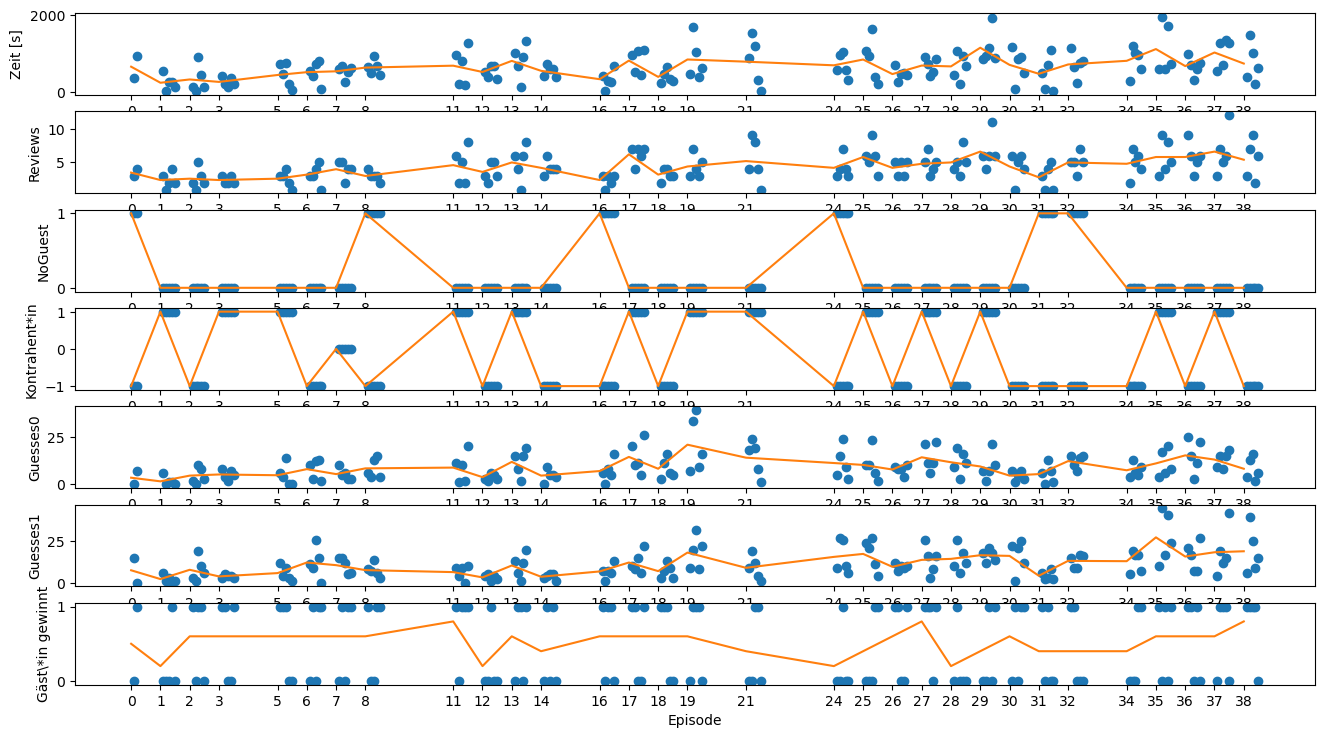

In [7]:
import numpy as np
# Plotte die Daten
import matplotlib.pyplot as plt
xticks = np.nanmean(np.floor(X[:, :, 0]), 1)
plt.figure(figsize = (16, 10))
for feature in range(1, len(legende)):
    plt.subplot(len(legende), 1, feature)
    plt.plot(X[:, :, 0].flatten(), X[:, :, feature].flatten(), 'o')
    plt.plot(xticks, np.nanmean(X[:, :, feature], 1))
    plt.xticks(xticks)
    plt.xlabel('Episode')
    plt.ylabel(legende[feature])
plt.show()

## Viel oder wenig raten?

Versuchen wir uns mal an einer echten Forschungsfrage: Gewinnen eher Gäst\*innen, die viel raten oder welche, die wenig raten? Um möglichst viel Störfaktoren aus den Daten zu nehmen, berücksichtigen wir mal nur diejenigen Folgen, bei denen Gäst\*innen gegen Christiane oder Jan gespielt haben (also nicht die Specials, bei denen Gäst\*innen gegeneinander oder Jan und Christiane gegeneinander gespielt haben) und analysieren die auch getrennt.

Innerhalb dieser Folgen schauen wir uns dann für alle Runden an, wie oft die Gästin\*der Gast im Schnitt geraten hat bei Runden, die verloren wurden versus Runden, die gewonnen wurden.

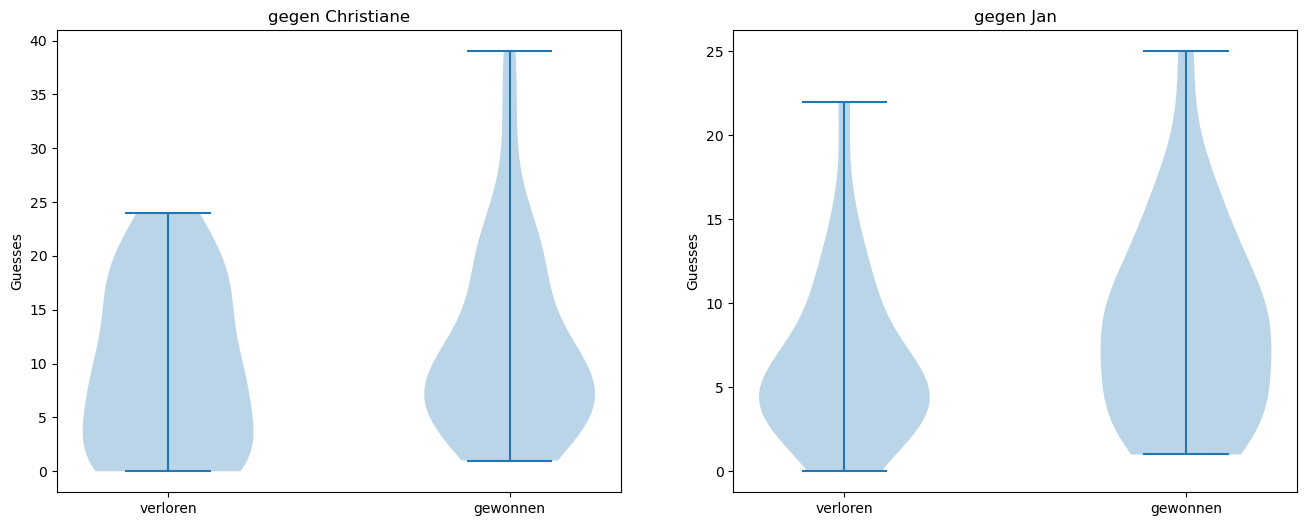

In [8]:
# Berücksichtige nur die Daten, bei denen Christiane oder Jan gegen jemand anders spielen
Xflat = np.reshape(X, (X.shape[0] * 5, X.shape[-1]))
Xflat = Xflat[np.abs(Xflat[:, NO_GUEST_COL_]) < .5, :]

# Plotte die Daten
import matplotlib.pyplot as plt
christiane_runden = Xflat[Xflat[:, CONTR_COL_] > +0.5, :]
jan_runden        = Xflat[Xflat[:, CONTR_COL_] < -0.5, :]
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
gewonnen = christiane_runden[:, WIN_COL_] > 0.5
guesses_gewonnen = christiane_runden[gewonnen, GUESS_GUEST_COL_]
guesses_verloren = christiane_runden[np.logical_not(gewonnen), GUESS_GUEST_COL_]
plt.violinplot([guesses_verloren, guesses_gewonnen], positions = [0, 1])
plt.xticks([0, 1], labels = ['verloren', 'gewonnen'])
plt.ylabel('Guesses')
plt.title('gegen Christiane')

plt.subplot(1, 2, 2)
gewonnen = jan_runden[:, WIN_COL_] > 0.5
guesses_gewonnen = jan_runden[gewonnen, GUESS_GUEST_COL_]
guesses_verloren = jan_runden[np.logical_not(gewonnen), GUESS_GUEST_COL_]
plt.violinplot([guesses_verloren, guesses_gewonnen], positions = [0, 1])
plt.xticks([0, 1], labels = ['verloren', 'gewonnen'])
plt.ylabel('Guesses')
plt.title('gegen Jan')
plt.show()

Das sieht ja schon mal so aus, als würde in Runden, die die guests gewinnen, die guests auch mehr raten. Prüfen wir das doch mal mit einem statistischen Test.

In [9]:
from scipy.stats import ranksums

gewonnen = christiane_runden[:, WIN_COL_] > 0.5
guesses_gewonnen = christiane_runden[gewonnen, GUESS_GUEST_COL_]
guesses_verloren = christiane_runden[np.logical_not(gewonnen), GUESS_GUEST_COL_]

_, p = ranksums(guesses_gewonnen, guesses_verloren)
print('Gegen Christiane hat die Nullhypothese einen p-Wert von %g' % p)

gewonnen = jan_runden[:, WIN_COL_] > 0.5
guesses_gewonnen = jan_runden[gewonnen, GUESS_GUEST_COL_]
guesses_verloren = jan_runden[np.logical_not(gewonnen), GUESS_GUEST_COL_]
_, p = ranksums(guesses_gewonnen, guesses_verloren)
print('Gegen Jan hat die Nullhypothese einen p-Wert von %g' % p)

Gegen Christiane hat die Nullhypothese einen p-Wert von 0.373045
Gegen Jan hat die Nullhypothese einen p-Wert von 0.152416


Aber vielleicht ist ja nur die Anzahl der Guesses nicht so aussagelräftig. Vielleicht kommt es ja mehr darauf an, ob ich _mehr_ guesse als mein\*e Treppenkontrahent\*in. Also nehmen wir als relevante Größe doch lieber das _Verhältnis_ zwischen Guest-Guesses und Host-Guesses. Noch besser: Wir nehmen den Zweier-Logarithmus des Verhältnisses. Dann ist 'gleich viel' genau bei 0, 'halb soviel' bei -1 und 'doppelt so viel' bei +1.

Gegen Christiane hat die Nullhypothese einen p-Wert von 0.00483968
Gegen Jan hat die Nullhypothese einen p-Wert von 0.159785


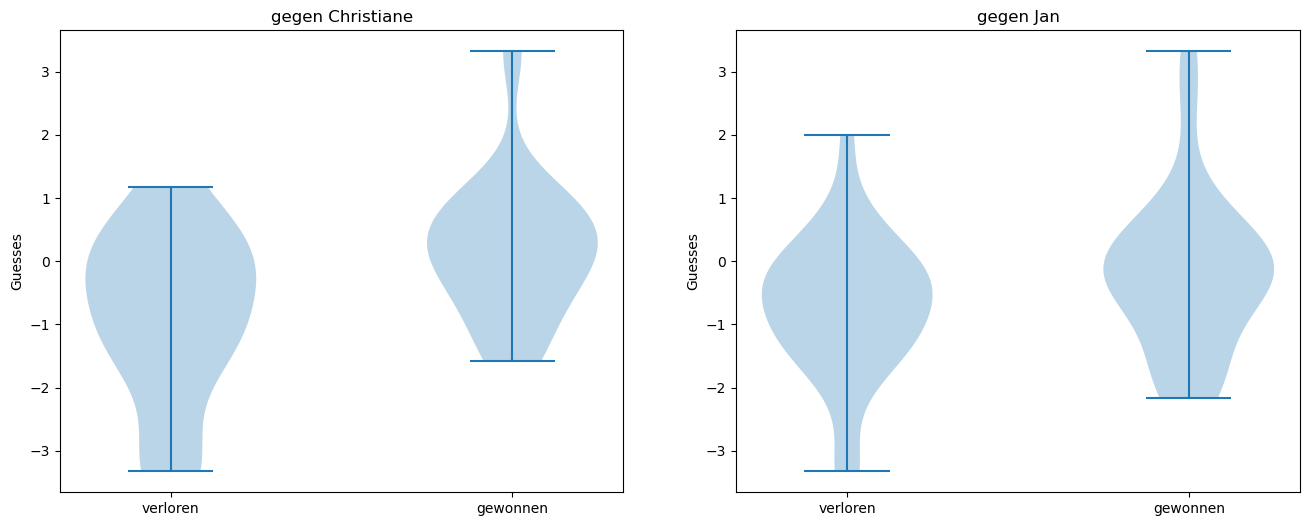

In [10]:
# wir bauen uns mal eine Funktion, die die Datentransformation vornimmt
def transform(data):
    # guesses des Gastes
    guesses_guest = data[:, GUESS_GUEST_COL_]
    # guesses des Hosts
    guesses_host  = data[:, GUESS_HOST_COL_]
    # wir müssen ein bisschen vorsichtig sein mit Runden, bei denen die*der Treppenkontrahent*in null mal
    # geraten haben. Dort ist das Verhältnis dann eigentlich unendlich. Wir stellen das Verhältnis in dem
    # Fall aber manuell auf 10, damit kein Quatsch herauskommt
    nonzero = guesses_host > 0.5
    rel_guesses   = np.copy(guesses_guest)
    rel_guesses[np.logical_not(nonzero)] = 10.
    rel_guesses[nonzero] /= guesses_host[nonzero]
    # und zum Ausgleich stellen wir auch bei Fällen, in denen die Gästin*der Gast kein mal geraten hat das
    # Verhältnis auf 0.1
    rel_guesses[rel_guesses < 0.1] = 0.1
    # Zum Abschluss nehmen wir den Zweier-Logarithmus
    return np.log2(rel_guesses)


plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
rel_guesses = transform(christiane_runden)
gewonnen = christiane_runden[:, WIN_COL_] > 0.5
guesses_gewonnen = rel_guesses[gewonnen] 
guesses_verloren = rel_guesses[np.logical_not(gewonnen)]

_, p = ranksums(guesses_gewonnen, guesses_verloren)
print('Gegen Christiane hat die Nullhypothese einen p-Wert von %g' % p)

plt.violinplot([guesses_verloren, guesses_gewonnen], positions = [0, 1])
plt.xticks([0, 1], labels = ['verloren', 'gewonnen'])
plt.ylabel('Guesses')
plt.title('gegen Christiane')

plt.subplot(1, 2, 2)
rel_guesses = transform(jan_runden)
gewonnen = jan_runden[:, WIN_COL_] > 0.5
guesses_gewonnen = rel_guesses[gewonnen]
guesses_verloren = rel_guesses[np.logical_not(gewonnen)]

_, p = ranksums(guesses_gewonnen, guesses_verloren)
print('Gegen Jan hat die Nullhypothese einen p-Wert von %g' % p)

plt.violinplot([guesses_verloren, guesses_gewonnen], positions = [0, 1])
plt.xticks([0, 1], labels = ['verloren', 'gewonnen'])
plt.ylabel('Guesses')
plt.title('gegen Jan')
plt.show()

Aber eigentlich ist es ja ein bisschen kontraintuitiv, die Guesses auf die y-Achse zu setzen. Eigentlich wollen wir ja wissen, wie sich unsere Chance, zu Gewinnen verhält abhängig davon, wie viel wir guessen. Versuchen wir das mal, direkter zu analysieren. Wir nehmen die relativen guesses auf die x-achse und bilden 'Kästchen', in denen wir Datenpunkte sammeln. Konkret nehmen wir alle Runden in einem Guess-Verhältnis unter 0.25 in ein Kästen, alle Runden mit einem Verhältnis 0.25 bis 0.5, alle Runden mit 0.5 bis 1, alle mit 1 bis 2, alle mit 2 bis 4 und alle darüber. Und dann berechnen wir für jedes Kästchen, wie viele dieser Runden gewonnen bzw. verloren wurden.

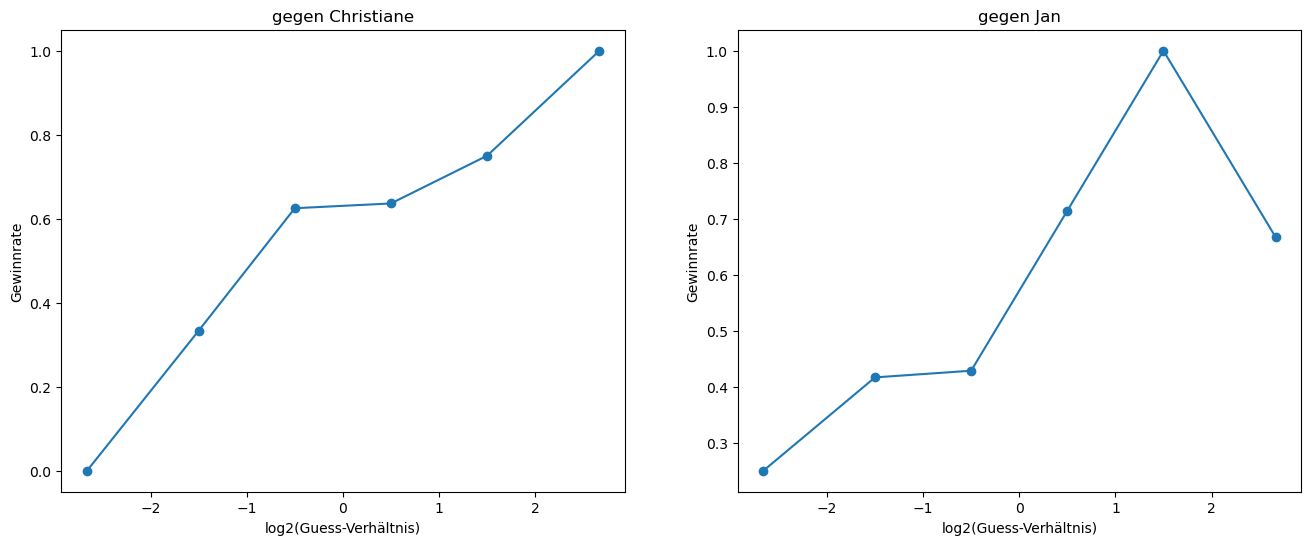

In [11]:
# wir schreiben uns eine Funktion, die diese Analyse vornimmt
def binning(guesses, wins):
    bin_borders = np.log2([0.1, .25, .5, 1., 2., 4., 10.1])
    if np.any(guesses < bin_borders[0]):
        raise ValueError('error, some values are too small')
    if np.any(guesses >= bin_borders[-1]):
        raise ValueError('error, some values are too large')
    x = 0.5 * (bin_borders[1:] + bin_borders[:-1])
    y = np.zeros_like(x)
    for i in range(len(y)):
        lo = bin_borders[i]
        hi = bin_borders[i+1]
        in_bin = np.logical_and(guesses >= lo, guesses < hi)
        y[i] = np.mean(wins[in_bin])
    return x, y


plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
rel_guesses = transform(christiane_runden)
x,y  = binning(rel_guesses, christiane_runden[:, WIN_COL_])
plt.plot(x, y, 'o-')
plt.xlabel('log2(Guess-Verhältnis)')
plt.ylabel('Gewinnrate')
plt.title('gegen Christiane')

plt.subplot(1, 2, 2)
rel_guesses = transform(jan_runden)
x,y  = binning(rel_guesses, jan_runden[:, WIN_COL_])
plt.plot(x, y, 'o-')
plt.xlabel('log2(Guess-Verhältnis)')
plt.ylabel('Gewinnrate')
plt.title('gegen Jan')
plt.show()

## Warum wird gegen Christiane mehr geraten?

Ein Nebenbefund oben war, dass gegen Christiane viel mehr geraten wird.
Schauen wir erstmal, ob das empirisch eigentlich stimmt, wenn wir statistisch drauf schauen.

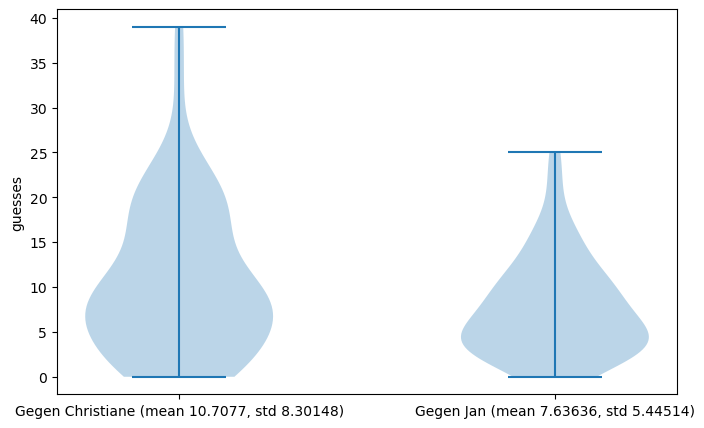

Nullhypothese: In Runden gegen Christiane wird genau so viel geraten wie in Runden gegen Jan: p = 0.0664264


In [12]:
plt.figure(figsize = (8,5))
plt.violinplot([christiane_runden[:, GUESS_GUEST_COL_], jan_runden[:, GUESS_GUEST_COL_]], positions = [0, 1])
plt.xticks([0, 1], labels = [
    'Gegen Christiane (mean %g, std %g)' % (np.mean(christiane_runden[:, GUESS_GUEST_COL_]), np.std(christiane_runden[:, GUESS_GUEST_COL_])),
    'Gegen Jan (mean %g, std %g)' % (np.mean(jan_runden[:, GUESS_GUEST_COL_]), np.std(jan_runden[:, GUESS_GUEST_COL_]))
])
plt.ylabel('guesses')
plt.show()

_, p = ranksums(christiane_runden[:, GUESS_GUEST_COL_], jan_runden[:, GUESS_GUEST_COL_])
print('Nullhypothese: In Runden gegen Christiane wird genau so viel geraten wie in Runden gegen Jan: p = %g' % p)

Woran liegt der Unterschied? Können wir das vielleicht durch die Zeit erklären oder die Anzahl der reviews? Checken wir mal, wie die Anzahl guesses mit der Zeit bzw. mit der Anzahl reviews korreliert.

correlation for Christianes Kontrahent*innen: 0.78161 (p = 1.54812e-14)
correlation for Christiane: 0.796097 (p = 2.25956e-15)
correlation for Jans Kontrahent*innen: 0.643481 (p = 1.16582e-07)
correlation for Jan: 0.823964 (p = 1.10546e-14)
correlation for Christianes Kontrahent*innen: 0.68375 (p = 3.4438e-10)
correlation for Christiane: 0.743063 (p = 1.36514e-12)
correlation for Jans Kontrahent*innen: 0.744535 (p = 7.21986e-11)
correlation for Jan: 0.705097 (p = 1.86081e-09)


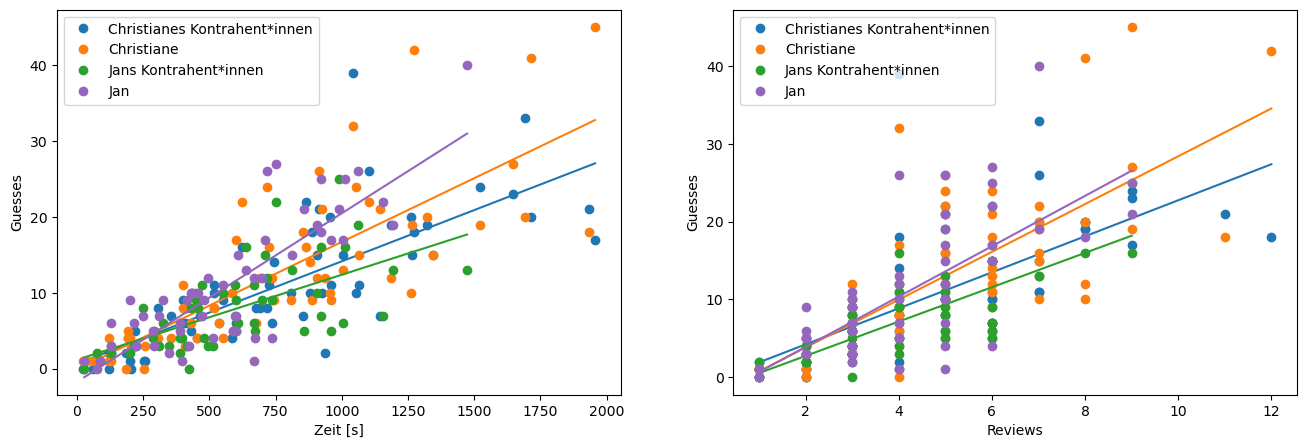

In [13]:
from scipy.stats import linregress
def plot_with_correlation(x, y, color, label):
    # compute linear regression
    slope, intercept, r, p, se = linregress(x, y)
    plt.plot(x, y, 'o', color = color, label = label)
    lo = np.min(x)
    hi = np.max(x)
    plt.plot([lo, hi], [lo * slope + intercept, hi * slope + intercept], '-', color = color)
    print('correlation for %s: %g (p = %g)' % (label, r, p))

plt.figure(figsize = (16,5))
plt.subplot(1, 2, 1)
plot_with_correlation(christiane_runden[:, TIME_COL_], christiane_runden[:, GUESS_GUEST_COL_], 'tab:blue', 'Christianes Kontrahent*innen')
plot_with_correlation(christiane_runden[:, TIME_COL_], christiane_runden[:, GUESS_HOST_COL_], 'tab:orange', 'Christiane')
plot_with_correlation(jan_runden[:, TIME_COL_], jan_runden[:, GUESS_GUEST_COL_], 'tab:green', 'Jans Kontrahent*innen')
plot_with_correlation(jan_runden[:, TIME_COL_], jan_runden[:, GUESS_HOST_COL_], 'tab:purple', 'Jan')
plt.xlabel('Zeit [s]')
plt.ylabel('Guesses')
plt.legend()
plt.subplot(1, 2, 2)
plot_with_correlation(christiane_runden[:, REVIEW_COL_], christiane_runden[:, GUESS_GUEST_COL_], 'tab:blue', 'Christianes Kontrahent*innen')
plot_with_correlation(christiane_runden[:, REVIEW_COL_], christiane_runden[:, GUESS_HOST_COL_], 'tab:orange', 'Christiane')
plot_with_correlation(jan_runden[:, REVIEW_COL_], jan_runden[:, GUESS_GUEST_COL_], 'tab:green', 'Jans Kontrahent*innen')
plot_with_correlation(jan_runden[:, REVIEW_COL_], jan_runden[:, GUESS_HOST_COL_], 'tab:purple', 'Jan')
plt.xlabel('Reviews')
plt.ylabel('Guesses')
plt.legend()
plt.show()


Das ist sicherlich der Fall. Und hier sind ein paar Statistiken der Runden gegen Christiane bzw. Jan.

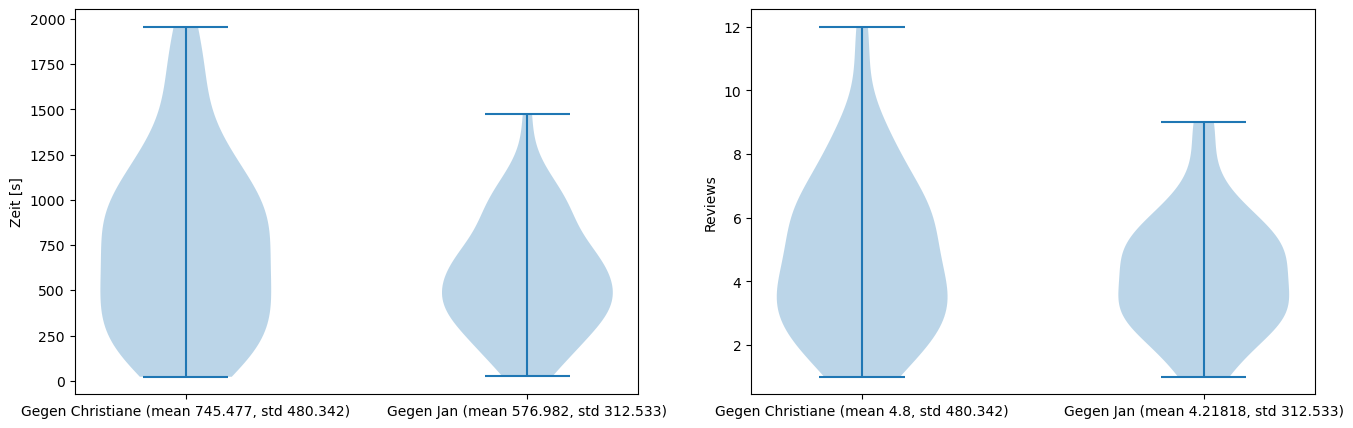

Nullhypothese: Runden gegen Christiane und Jan dauern gleich lang: p = 0.0874272
Nullhypothese: Runden gegen Christiane und Jan haben gleich viele Reviews: p = 0.259688


In [14]:
plt.figure(figsize = (16,5))
plt.subplot(1, 2, 1)
plt.violinplot([christiane_runden[:, TIME_COL_], jan_runden[:, TIME_COL_]], positions = [0, 1])
plt.xticks([0, 1], labels = [
    'Gegen Christiane (mean %g, std %g)' % (np.mean(christiane_runden[:, TIME_COL_]), np.std(christiane_runden[:, TIME_COL_])),
    'Gegen Jan (mean %g, std %g)' % (np.mean(jan_runden[:, TIME_COL_]), np.std(jan_runden[:, TIME_COL_]))
])
plt.ylabel('Zeit [s]')
plt.subplot(1, 2, 2)
plt.violinplot([christiane_runden[:, REVIEW_COL_], jan_runden[:, REVIEW_COL_]], positions = [0, 1])
plt.xticks([0, 1], labels = [
    'Gegen Christiane (mean %g, std %g)' % (np.mean(christiane_runden[:, REVIEW_COL_]), np.std(christiane_runden[:, TIME_COL_])),
    'Gegen Jan (mean %g, std %g)' % (np.mean(jan_runden[:, REVIEW_COL_]), np.std(jan_runden[:, TIME_COL_]))
])
plt.ylabel('Reviews')
plt.show()

_, p = ranksums(christiane_runden[:, TIME_COL_], jan_runden[:, TIME_COL_])
print('Nullhypothese: Runden gegen Christiane und Jan dauern gleich lang: p = %g' % p)

_, p = ranksums(christiane_runden[:, REVIEW_COL_], jan_runden[:, REVIEW_COL_])
print('Nullhypothese: Runden gegen Christiane und Jan haben gleich viele Reviews: p = %g' % p)

Und jetzt schauen wir uns noch an, wie die Anzahl der Guesses pro Sekunde und pro Review sich so verteilt.

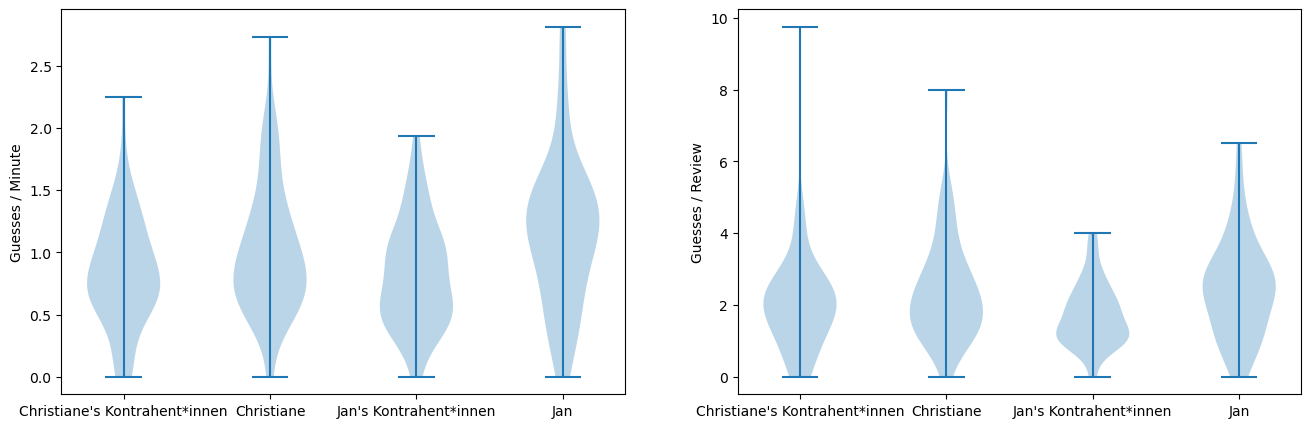

Christiane rät 1.01417 mal pro Minute (std: 0.517305)
Jan rät 1.15319 mal pro Minute (std: 0.586721)
Nullhypothese: Christiane rät genau so viel pro Zeit wie Jan: p = 0.101417
Christiane's Kontrahent*innen raten 0.838685 mal pro Minute (std: 0.441714)
Jan's Kontrahent*innen raten 0.819841 mal pro Minute (std: 0.424052)
Nullhypothese: Christiane's Kontrahent*innen raten pro Zeit genau so viel wie Jan's: p = 0.614968


In [15]:
plt.figure(figsize = (16,5))
plt.subplot(1, 2, 1)
guesses_pro_min = [
    60 * christiane_runden[:, GUESS_GUEST_COL_] / christiane_runden[:, TIME_COL_],
    60 * christiane_runden[:, GUESS_HOST_COL_] / christiane_runden[:, TIME_COL_],
    60 * jan_runden[:, GUESS_GUEST_COL_] / jan_runden[:, TIME_COL_],
    60 * jan_runden[:, GUESS_HOST_COL_] / jan_runden[:, TIME_COL_]
]
plt.violinplot(guesses_pro_min, positions = [0, 1, 2, 3])
plt.xticks([0, 1, 2, 3], labels = ['Christiane\'s Kontrahent*innen', 'Christiane', 'Jan\'s Kontrahent*innen', 'Jan'])
plt.ylabel('Guesses / Minute')

plt.subplot(1, 2, 2)
guesses_pro_review = [
    christiane_runden[:, GUESS_GUEST_COL_] / christiane_runden[:, REVIEW_COL_],
    christiane_runden[:, GUESS_HOST_COL_] / christiane_runden[:, REVIEW_COL_],
    jan_runden[:, GUESS_GUEST_COL_] / jan_runden[:, REVIEW_COL_],
    jan_runden[:, GUESS_HOST_COL_] / jan_runden[:, REVIEW_COL_]
]
plt.violinplot(guesses_pro_review, positions = [0, 1, 2, 3])
plt.xticks([0, 1, 2, 3], labels = ['Christiane\'s Kontrahent*innen', 'Christiane', 'Jan\'s Kontrahent*innen', 'Jan'])
plt.ylabel('Guesses / Review')
plt.show()

print('Christiane rät %g mal pro Minute (std: %g)' % (np.mean(guesses_pro_min[1]), np.std(guesses_pro_min[1])))
print('Jan rät %g mal pro Minute (std: %g)' % (np.mean(guesses_pro_min[3]), np.std(guesses_pro_min[3])))

w, p = ranksums(guesses_pro_min[1], guesses_pro_min[3])
print('Nullhypothese: Christiane rät genau so viel pro Zeit wie Jan: p = %g' % p)

print('Christiane\'s Kontrahent*innen raten %g mal pro Minute (std: %g)' % (np.mean(guesses_pro_min[0]), np.std(guesses_pro_min[0])))
print('Jan\'s Kontrahent*innen raten %g mal pro Minute (std: %g)' % (np.mean(guesses_pro_min[2]), np.std(guesses_pro_min[2])))

w, p = ranksums(guesses_pro_min[0], guesses_pro_min[2])
print('Nullhypothese: Christiane\'s Kontrahent*innen raten pro Zeit genau so viel wie Jan\'s: p = %g' % p)

## Wer ist Treppenmeister\*in? Christiane oder Jan?

Christiane und Jan haben die Frage aufgeworfen, wer von beiden wohl besser im Treppenraten ist. Die erste Idee wäre, einfach nur zu zählen, wie viele Runden sie gewonnen haben (von denen, die sie gespielt haben).

In [16]:
christiane_wins = np.sum(1 - christiane_runden[:, WIN_COL_])
jan_wins = np.sum(1 - jan_runden[:, WIN_COL_])
print('Christiane hat %d von %d Runden (%g%%) gewonnen.' % (christiane_wins, christiane_runden.shape[0], np.round(100 * christiane_wins / christiane_runden.shape[0])))
print('Jan hat %d von %d Runden (%g%%) gewonnen.' % (jan_wins, jan_runden.shape[0], np.round(100 * jan_wins / jan_runden.shape[0])))

Christiane hat 29 von 65 Runden (45%) gewonnen.
Jan hat 27 von 55 Runden (49%) gewonnen.


Das ist aber tatsächlich gar kein so gutes Maß für die Spielstärke, denn es könnte ja sein, dass Christiane einfach immer gegen schwierigere Kontrahent\*innen gespielt hat. Tatsächlich geben unsere Analysen bereits Anlass dazu, das zu glauben, denn wir wissen ja bereits, dass Christianes Kontrahent\*innen mehr raten und wer mehr rät auch eher gewinnt. Um das auszugleichen können wir uns eine Analyse von oben noch einmal genauer anschauen: Wie sieht die Lage denn aus, wenn wir die Gewinnrate gegen das Rateverhältnis plotten? Dann haben wir ja den Einfluss des Rateverhältnisses rausgerechnet.

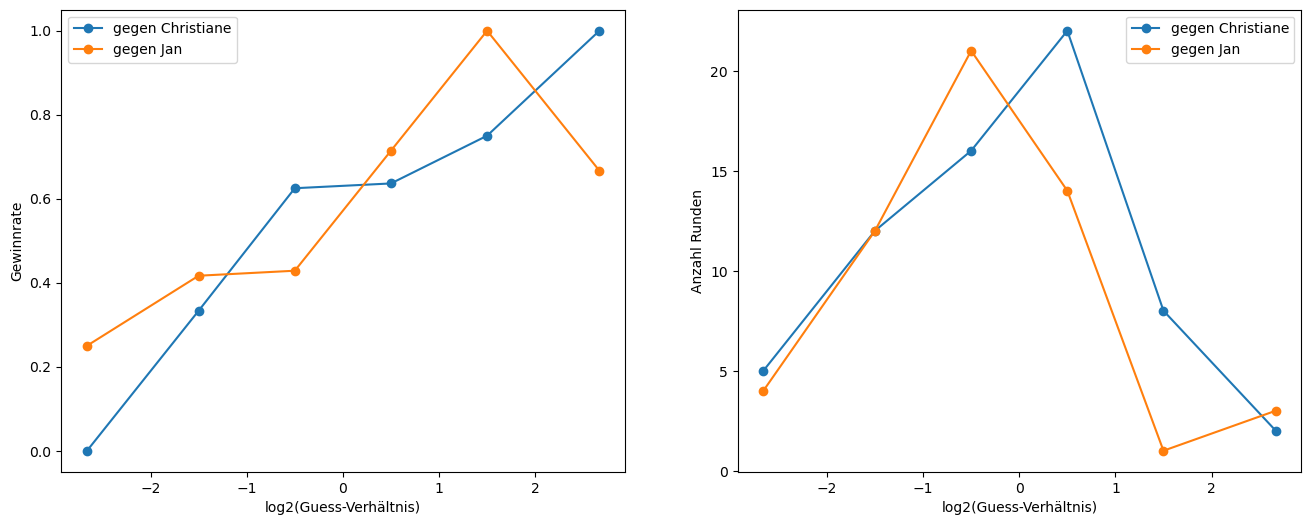

In [17]:
# wir schreiben uns eine Funktion, die diese Analyse vornimmt
def binning(guesses, wins):
    bin_borders = np.log2([0.1, .25, .5, 1., 2., 4., 10.1])
    if np.any(guesses < bin_borders[0]):
        raise ValueError('error, some values are too small')
    if np.any(guesses >= bin_borders[-1]):
        raise ValueError('error, some values are too large')
    x = 0.5 * (bin_borders[1:] + bin_borders[:-1])
    y = np.zeros_like(x)
    n = np.zeros_like(x)
    for i in range(len(y)):
        lo = bin_borders[i]
        hi = bin_borders[i+1]
        in_bin = np.logical_and(guesses >= lo, guesses < hi)
        n[i] = np.sum(in_bin)
        y[i] = np.mean(wins[in_bin])
    return x, y, n


plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
rel_guesses = transform(christiane_runden)
x,y,n1 = binning(rel_guesses, christiane_runden[:, WIN_COL_])
plt.plot(x, y, 'o-')
rel_guesses = transform(jan_runden)
x,y,n2 = binning(rel_guesses, jan_runden[:, WIN_COL_])
plt.plot(x, y, 'o-')
plt.xlabel('log2(Guess-Verhältnis)')
plt.ylabel('Gewinnrate')
plt.legend(['gegen Christiane', 'gegen Jan'])

plt.subplot(1, 2, 2)
plt.plot(x, n1, 'o-')
plt.plot(x, n2, 'o-')
plt.xlabel('log2(Guess-Verhältnis)')
plt.ylabel('Anzahl Runden')
plt.yticks([0, 5, 10, 15, 20])
plt.legend(['gegen Christiane', 'gegen Jan'])
plt.show()

Hier sieht es leider auch nicht so gut aus für Christiane. Die Gewinnrate gegen Christiane ist fast immer höher als gegen Jan, außer wenn jemand deutlich mehr rät als Jan (was aber selten vorkommt und daher statistisch nicht so zuverlässig ist).
Aber vielleicht ist das Rateverhältnis ja nicht der einzige Störparameter. Es gibt ja noch viele Dinge, die systematisch zwischen Runden gegen Christiane und Runden gegen Jan variieren können, sodass Christiane eher im Nachteil ist.

Was ist denn, wenn wir nur die Runden betrachten, in denen Christiane und Jan gegeneinander gespielt haben, nämlich die Runden in den Episoden 8, 16 und 23?

In [18]:
christiane_wins = 0
jan_wins = 0
shared_wins = 0
for episode in data:
    # Betrachte nur Episoden nach der Nullnummer, in denen Christiane gegen Jan spielt
    if not (episode['index'] > 0 and episode['players'][0] == 'Christiane' and episode['players'][1] == 'Jan'):
        continue
    # Wir gehen über alle Runden
    for r in range(len(episode['rounds'])):
        # ... und schauen, ob Christiane oder Jan gewonnen haben
        last_guess = episode['rounds'][r]['reviews'][-1]['guesses'][-1]
        if 'shared' in last_guess:
            shared_wins += 1
        if last_guess['player'] == 'Christiane' or ('shared' in last_guess):
            christiane_wins += 1
        if last_guess['player'] == 'Jan' or ('shared' in last_guess):
            jan_wins += 1
print('Christiane hat %d Runden gewonnen' % christiane_wins)
print('Jan hat %d Runden gewonnen' % jan_wins)
print('%d Runden waren geteilt gewonnen' % shared_wins)

Christiane hat 11 Runden gewonnen
Jan hat 17 Runden gewonnen
3 Runden waren geteilt gewonnen


Hier ist es tatsächlich knapp. Jan hat nur sechs Runde mehr geholt. Und könnte so eine Differenz nicht auch reiner Zufall sein? Nehmen wir mal an, Christiane und Jan seien exakt gleich gut im Raten. Dann müsste es ja gleich wahrscheinlich sein, ob Christiane oder Jan eine Runde holt. Sagen wir, die Chance ist 44% für eine Christiane-Runde, 44% für eine Jan-Runde und 12% für einen geteilten Sieg (die 12% kommen aus unseren beobachteten Daten: 3/25 = 12% der Siege waren geteilt).

Bei zwei Runden wären es 56% * 56% = 31% Chance für zwei Siege für Jan, 2 * 44% * 56% = 49% für einen Sieg für Jan und 44% * 44% = 20% Chance für keinen Sieg für Jan.

Hier haben wir es ja mit 25 Runden zu tun. Da wollen wir die Wahrscheinlichkeiten nicht mehr manuell ausrechnen sondern ziehen lieber den Computer zu Rate. Die entsprechende Wahrscheinlichkeitsverteilung heißt auch _Binomialverteilung_ mit 25 Versuchen und Erfolgswahrscheinlichkeit 56%.

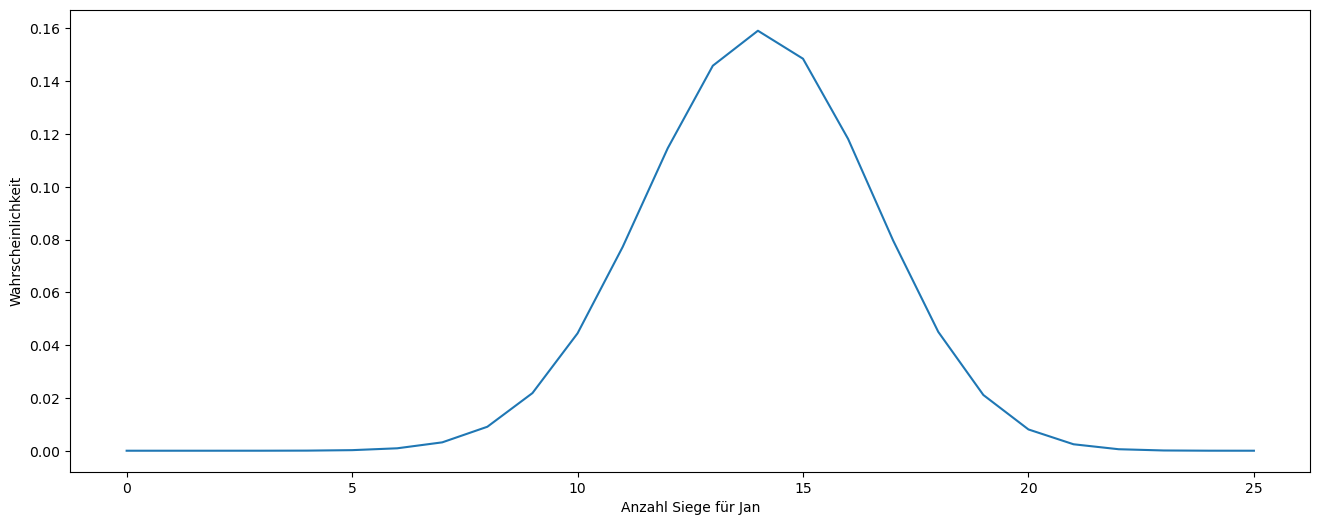

In [19]:
from scipy.stats import binom

num_runden = christiane_wins + jan_wins - shared_wins
num_siege = np.arange(0, num_runden + 1)

binom_p = binom.pmf(num_siege, num_runden, p = 0.56)

plt.figure(figsize = (16, 6))
plt.plot(num_siege, binom_p)
plt.xlabel('Anzahl Siege für Jan')
plt.ylabel('Wahrscheinlichkeit')
plt.show()


Die Wahrscheinlichkeit, dass Jan's Siege durch Zufall entstanden sind, entspricht nun der Wahrscheinlichkeit für seine tatsächlichen 11 Siege oder mehr. Das ist der so genannte $p$-Wert aus der Statistik.

In [20]:
p = np.sum(binom_p[jan_wins:])
print('Die Wahrscheinlichkeit, dass Jan\'s %d Siege durch Zufall entstanden sind ist: %g%%' % (jan_wins, p))

Die Wahrscheinlichkeit, dass Jan's 17 Siege durch Zufall entstanden sind ist: 0.156899%


Das ist immer noch recht wahrscheinlich. In der Statistik würden wir nur davon sprechen, dass Jan signifikant häufiger gewonnen hat als Christiane, wenn diese Wahrscheinlichkeit kleiner als 5% ist.

Die Indizien sprechen also dafür, dass Jan vielleicht knapp besser im Treppenraten ist, aber klar ist die Lage nicht. Ebenfalls wichtig: Es gibt noch mögliche andere Erklärungen für Gewinnen, zum Beispiel könnte es sein, dass tendenziell eher Treppen vorkamen, die in Genres lagen, bei denen Jan das Raten leichter fällt; oder Treppen, die bei Jan kürzer zurückliegen und deshalb präsenter sind. Generell ist die Schwierigkeit einer Treppe ja personenabhängig. Die Spielstärke einer Person misst sich wohl daran, wie gut man *generell* Treppen erraten kann.

## Spieler:innenbezogene Analysen

Schauen wir mal, was uns bei den Spieler:innen auffällt. Wer hat die meisten Runden geholt? Wer hat die meisten guesses pro Zeit? Wer hat die kürzesten Runden? Wer hat mit den wenigsten guesses Runden geholt? Und so weiter.

In [21]:
# accumulate all rounds for each player
players_data = {}
for episode in data:
    for player in episode['players']:
        player_data = players_data.setdefault(player, {'name' : player, 'rounds' : []})
        player_data['rounds'] += episode['rounds']
# compute statistics
for player in players_data:
    player_data = players_data[player]
    # num rounds
    player_data['num_rounds'] = len(player_data['rounds'])
    # win rate
    wins = 0
    for round in player_data['rounds']:
        last_guess = round['reviews'][-1]['guesses'][-1]
        if last_guess['player'] == player or 'shared' in last_guess:
            wins += 1
    player_data['wins'] = wins
    player_data['win_rate'] = wins / player_data['num_rounds']
    # guesses, time, and guesses per time
    num_guesses   = 0
    other_guesses = 0
    time          = 0
    for round in player_data['rounds']:
        start_time = convert_to_seconds(round['start_time'])
        end_time   = convert_to_seconds(round['end_time'])
        time_delta = end_time - start_time
        time      += time_delta
        for review in round['reviews']:
            for guess in review['guesses']:
                if guess['player'] == player:
                    num_guesses += 1
                else:
                    other_guesses += 1
    player_data['guesses_per_round']  = num_guesses / player_data['num_rounds']
    player_data['other_guesses_per_round'] = other_guesses / player_data['num_rounds']
    player_data['guess_ratio']        = num_guesses / other_guesses
    player_data['seconds_per_round']  = time / player_data['num_rounds']
    player_data['guesses_per_minute'] = 60 * num_guesses / time
    # guesses per win, time per win, and guesses per time per win
    # guess_ratio_per_win
    num_guesses   = 0
    other_guesses = 0
    time          = 0
    wins          = 0
    for round in player_data['rounds']:
        last_guess = round['reviews'][-1]['guesses'][-1]
        if last_guess['player'] == player or 'shared' in last_guess:
            wins += 1
        else:
            continue
        start_time = convert_to_seconds(round['start_time'])
        end_time   = convert_to_seconds(round['end_time'])
        time_delta = end_time - start_time
        time      += time_delta
        for review in round['reviews']:
            for guess in review['guesses']:
                if guess['player'] == player:
                    num_guesses += 1
                else:
                    other_guesses += 1
    if wins < 1:
        player_data['guesses_per_win']     = np.inf
        player_data['other_guesses_per_win'] = np.inf
        player_data['guess_ratio_in_wins'] = np.inf
        player_data['seconds_per_win']     = np.inf
        player_data['guesses_per_minute_in_wins'] = np.inf
    else:
        player_data['guesses_per_win']     = num_guesses / wins
        player_data['other_guesses_per_win'] = other_guesses / wins
        if other_guesses < 1:
            player_data['guess_ratio_in_wins'] = np.inf
        else:
            player_data['guess_ratio_in_wins'] = num_guesses / other_guesses
        player_data['seconds_per_win']     = time / wins
        player_data['guesses_per_minute_in_wins'] = 60 * num_guesses / time

In [22]:
# rank all players on all features, from low to high
for feature in players_data['Christiane']:
    if feature == 'name' or feature == 'rounds':
        continue
    print('--- %s ---' % feature)
    # create a sorted version of the player list according to the feature
    ranked_player_list = list(players_data.values())
    ranked_player_list.sort(key = lambda player_data : player_data[feature])
    for player_data in ranked_player_list:
        print('%s: %g' % (player_data['name'], player_data[feature]))

--- num_rounds ---
Julius: 5
Becci: 5
Kamil: 5
Max: 5
Jana: 5
David: 5
Anne: 5
Markus: 5
Miriam: 5
Louis: 5
Daniel: 5
Sven: 5
Daniela: 5
Marco: 5
Steve: 5
Hanna: 5
Annemie: 5
Stefan: 5
Denise: 5
Britt-Marie: 5
Lissi: 5
Bob: 5
Christopher: 10
Sumi: 10
Jan: 82
Christiane: 92
--- wins ---
Julius: 1
Jana: 1
Steve: 1
Anne: 2
Daniel: 2
Sven: 2
Hanna: 2
Stefan: 2
Becci: 3
Kamil: 3
David: 3
Markus: 3
Miriam: 3
Louis: 3
Daniela: 3
Annemie: 3
Denise: 3
Britt-Marie: 3
Lissi: 3
Max: 4
Marco: 4
Bob: 4
Christopher: 5
Sumi: 6
Christiane: 44
Jan: 47
--- win_rate ---
Julius: 0.2
Jana: 0.2
Steve: 0.2
Anne: 0.4
Daniel: 0.4
Sven: 0.4
Hanna: 0.4
Stefan: 0.4
Christiane: 0.478261
Christopher: 0.5
Jan: 0.573171
Becci: 0.6
Sumi: 0.6
Kamil: 0.6
David: 0.6
Markus: 0.6
Miriam: 0.6
Louis: 0.6
Daniela: 0.6
Annemie: 0.6
Denise: 0.6
Britt-Marie: 0.6
Lissi: 0.6
Max: 0.8
Marco: 0.8
Bob: 0.8
--- guesses_per_round ---
Julius: 1.6
Jana: 3.8
Becci: 4.6
Anne: 4.6
Annemie: 4.6
Sumi: 5.1
Stefan: 7.4
Daniela: 7.8
Christopher: 

## Verteilungen über Runden

Wie verteilen sich Anzahl guesses, Anzahl reviews, Zeit (minuten) und guesses pro Minute eigentlich so über die Runden?

In [23]:
distr_data = []
distr_labels = ['num_guesses', 'num_reviews', 'time', 'guesses_per_min']

for episode in data:
    for round in episode['rounds']:
        # count guesses
        num_guesses = 0
        for review in round['reviews']:
            num_guesses += len(review['guesses'])
        # count reviews
        num_reviews = len(round['reviews'])
        # count time
        start_time = convert_to_seconds(round['start_time'])
        end_time   = convert_to_seconds(round['end_time'])
        time_delta = (end_time - start_time) / 60
        # add to data
        distr_data.append([num_guesses, num_reviews, time_delta, num_guesses / time_delta])

distr_data = np.array(distr_data)

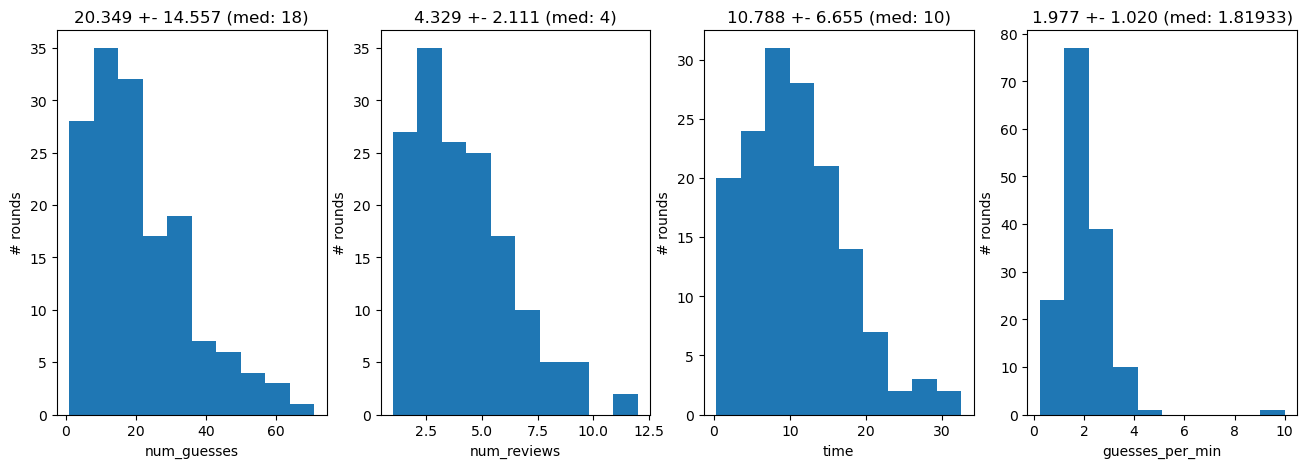

In [24]:
plt.figure(figsize = (16, 5))
for j in range(len(distr_labels)):
    plt.subplot(1, len(distr_labels), j+1)
    plt.hist(distr_data[:, j])
    mean   = np.mean(distr_data[:, j])
    std    = np.std(distr_data[:, j])
    median = np.median(distr_data[:, j])
    plt.title('%.3f +- %.3f (med: %g)' % (mean, std, median))
    plt.xlabel(distr_labels[j])
    plt.ylabel('# rounds')
plt.show()

In [25]:
# Statistiken für die letzte Episode
np.mean(distr_data[-5:, :], 0)

array([27.2       ,  5.4       , 12.29666667,  2.2912514 ])